<a href="https://colab.research.google.com/github/sdelozi/Diabetes-Prediction/blob/main/binary_5050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

data = pd.read_csv('/content/diabetes_binary_5050split_health_indicators_BRFSS2015 (1).csv')

In [ ]:
df = data.copy()
print(df.shape)
df.head()

(70692, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
print(df.info())
print(" ")
print(df.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [ ]:
# Set all columns except for "BMI" to int type
columns_to_convert = df.columns.difference(['BMI'])
df[columns_to_convert] = df[columns_to_convert].astype(int)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  int64  
 1   HighBP                70692 non-null  int64  
 2   HighChol              70692 non-null  int64  
 3   CholCheck             70692 non-null  int64  
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  int64  
 6   Stroke                70692 non-null  int64  
 7   HeartDiseaseorAttack  70692 non-null  int64  
 8   PhysActivity          70692 non-null  int64  
 9   Fruits                70692 non-null  int64  
 10  Veggies               70692 non-null  int64  
 11  HvyAlcoholConsump     70692 non-null  int64  
 12  AnyHealthcare         70692 non-null  int64  
 13  NoDocbcCost           70692 non-null  int64  
 14  GenHlth               70692 non-null  int64  
 15  MentHlth           

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26.0,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26.0,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26.0,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28.0,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29.0,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


In [ ]:
# Proportion of target classes
print("Proportion of Target Classes (Overall dataset):")
print(df['Diabetes_binary'].value_counts(normalize=True),"\n")

#Checking for duplicated rows
print("Duplicate rows:", df.duplicated().sum())

duplicates_df = df[df.duplicated()]
duplicates_df['Diabetes_binary'].value_counts()

Proportion of Target Classes (Overall dataset):
Diabetes_binary
0    0.5
1    0.5
Name: proportion, dtype: float64 

Duplicate rows: 1635


Diabetes_binary
0    1386
1     249
Name: count, dtype: int64

In [ ]:
#Drop duplicate rows
df.drop_duplicates(inplace = True)
df.shape

(69057, 22)

In [ ]:
# List of binary, ordinal & numerical features
target = ['Diabetes_binary']
features_binary = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
                   'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
features_ordinal = ['GenHlth', 'Age', 'Education', 'Income']
features_numerical = ['BMI', 'MentHlth', 'PhysHlth']

Proportion of Target Classes:
Diabetes_binary
0    0.5
1    0.5
Name: proportion, dtype: float64 



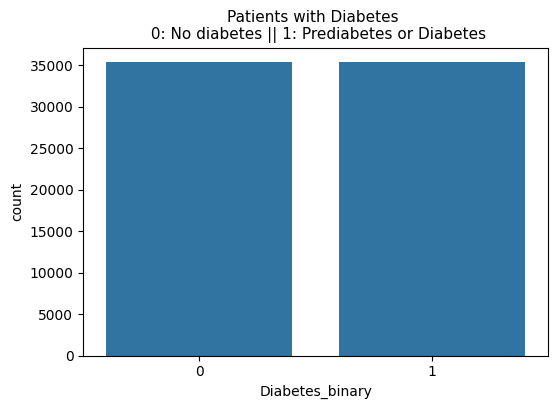

In [ ]:
print("Proportion of Target Classes:")
print(df['Diabetes_binary'].value_counts(normalize=True),"\n")

# Plot distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Diabetes_binary'])
plt.title('Patients with Diabetes \n 0: No diabetes || 1: Prediabetes or Diabetes', fontsize=11)

plt.show()

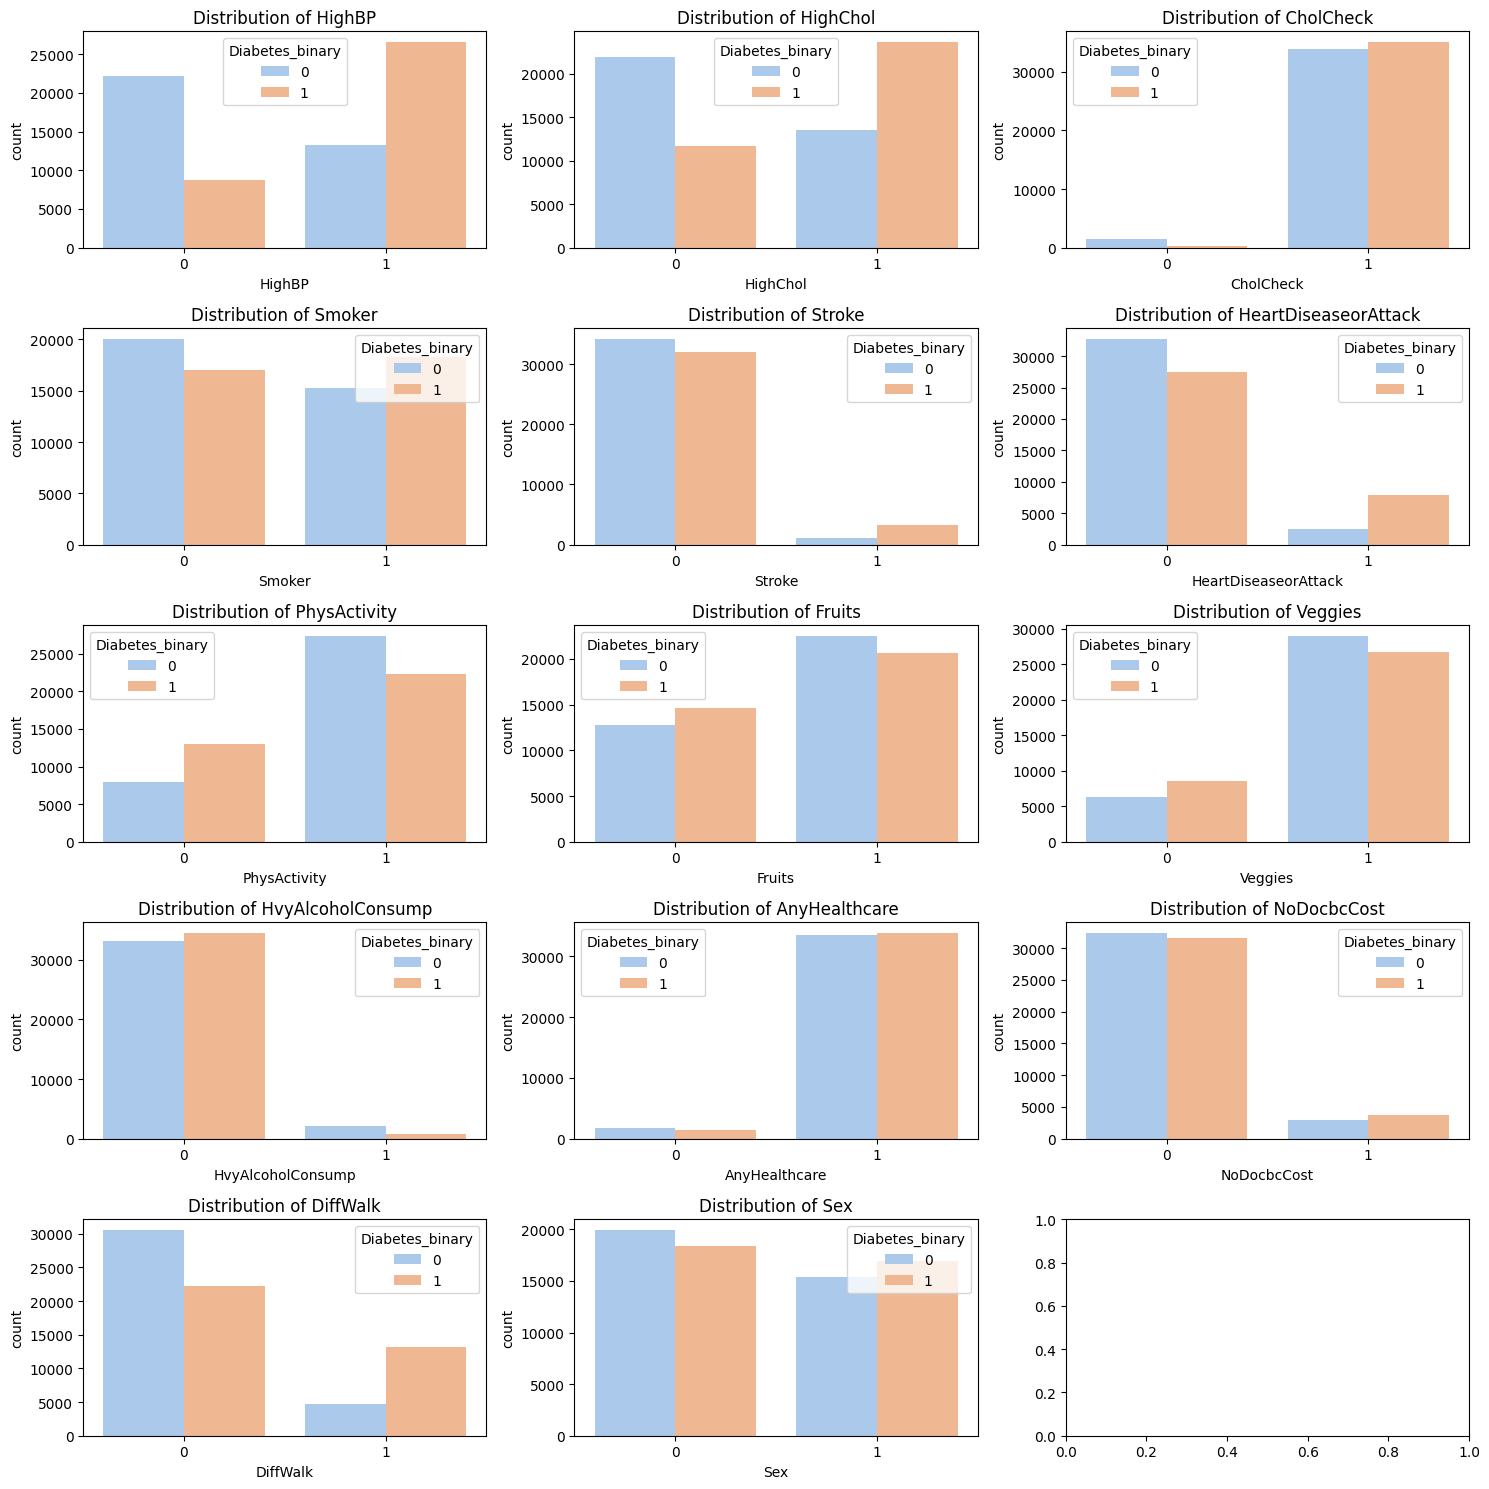

In [ ]:
# Set up subplots for plotting
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Loop through binary features and create plots
for i, feature in enumerate(features_binary):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue='Diabetes_binary', data=df, ax=axes[row, col], palette='pastel')
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

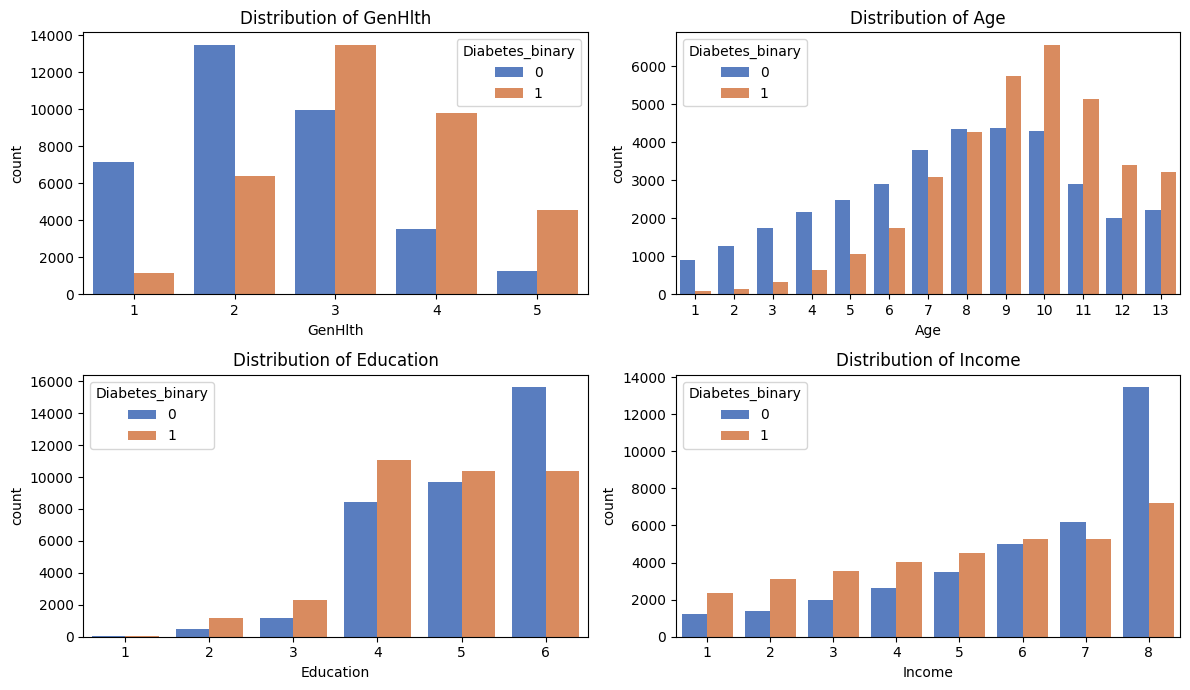

In [ ]:
# Set up subplots for plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,7))
fig.subplots_adjust(hspace=0.5)

# Loop through binary features and create plots
for i, feature in enumerate(features_ordinal):
    row, col = i // 2, i % 2
    sns.countplot(x=feature, hue='Diabetes_binary', data=df, ax=axes[row, col], palette='muted')
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

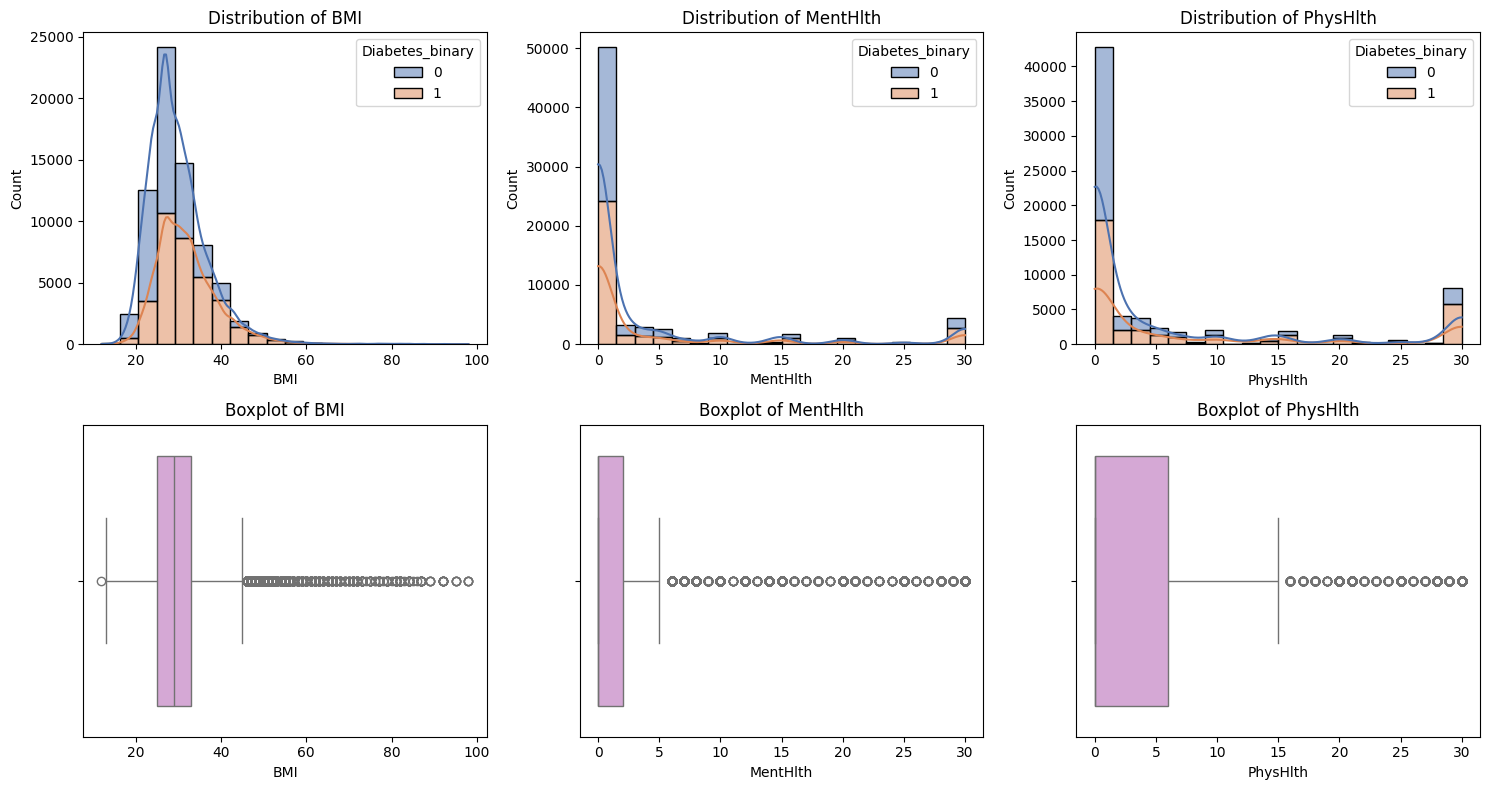

In [ ]:
# Plot histplot and boxplot for each numerical feature
plt.figure(figsize=(15, 8))

for i, feature in enumerate(features_numerical, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df, x=feature, kde=True, bins=20, hue='Diabetes_binary', multiple='stack', palette='deep')
    plt.title(f'Distribution of {feature}')

    plt.subplot(2, 3, i + 3)
    sns.boxplot(x=df[feature], color='plum')
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

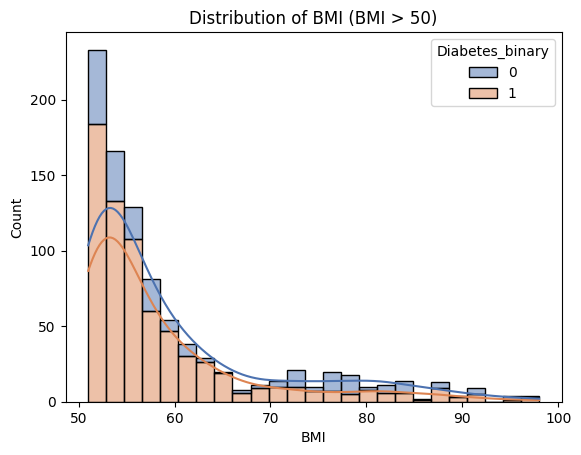

In [ ]:
# Zooming in, plot the histogram for BMI > 50
sns.histplot(df[df['BMI'] > 50], x='BMI', kde=True, bins=25, hue='Diabetes_binary', multiple='stack', palette='deep')
plt.title('Distribution of BMI (BMI > 50)')
plt.show()

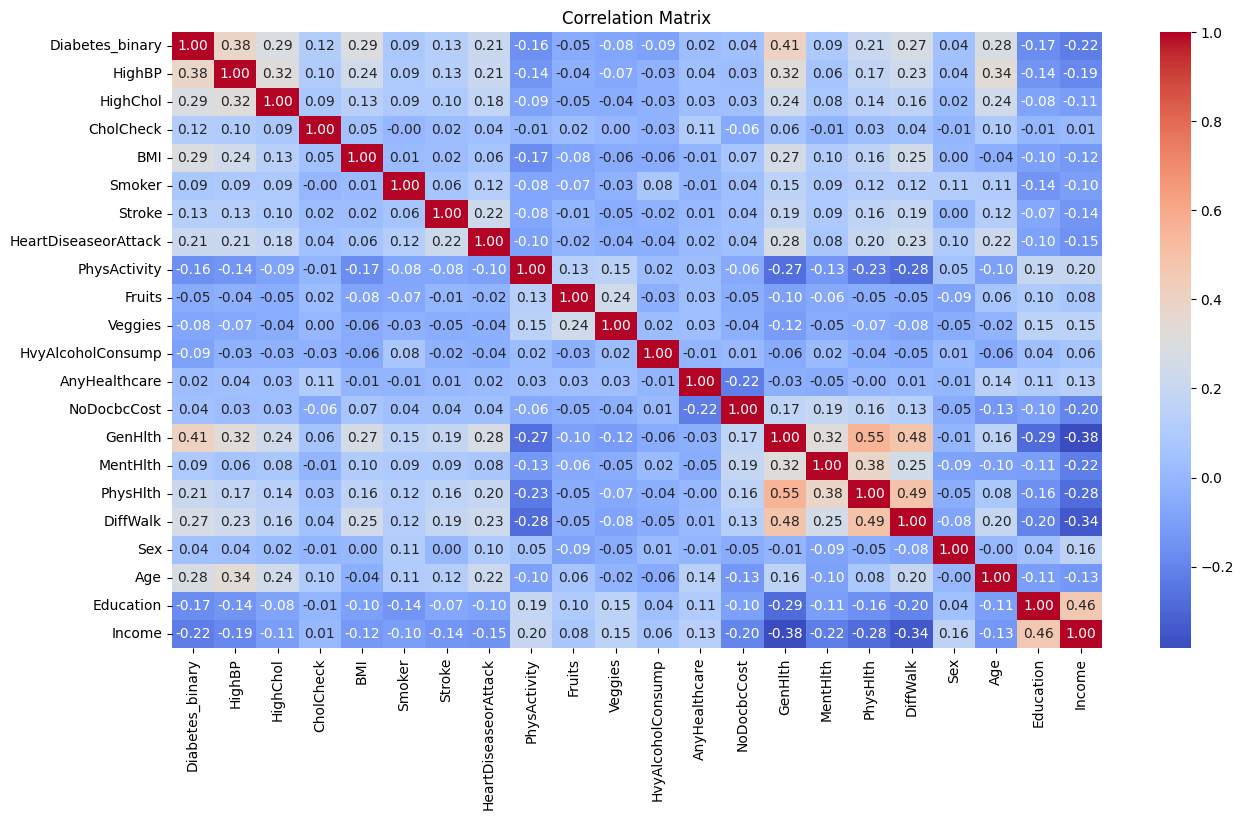

In [ ]:
# Plot the correlation matrix heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Separate target variable & features
X = df.drop(columns = 'Diabetes_binary')
y = df['Diabetes_binary']

print(X.shape, y.shape)

(70692, 21) (70692,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88, stratify = y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(56553, 21) (14139, 21) (56553,) (14139,)


In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
# Define a python function to compute training & testing set metrics
# The weighted average is taken in order to account for class imbalance
def measure_error(y_true, y_pred, label):
    return pd.Series({
        'balanced_accuracy': balanced_accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted'),
        'f1': f1_score(y_true, y_pred, average='weighted'),
        'auc_roc': roc_auc_score(y_true, y_pred, average='weighted')
    }, name=label)


# Function to evaluate the model - fits the model, then computes training vs testing set metrics
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Computes the metrics for the training & testing set, and presents them in a dataframe
    train_test_error = pd.concat([measure_error(y_train, y_train_pred, 'Train'),
                                    measure_error(y_test, y_test_pred, 'Test')],
                                    axis=1)
    print(train_test_error, "\n")

    # Display classification report for test set
    print("Testing Set Classification Report:\n", classification_report(y_test, y_test_pred))

    # Display confusion matrix for the Test set
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(cm)

    return disp.plot()

                      Train      Test
balanced_accuracy  0.747122  0.751822
precision          0.747542  0.752055
recall             0.747122  0.751821
f1                 0.747015  0.751764
auc_roc            0.747122  0.751822 

Testing Set Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      7070
           1       0.74      0.77      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



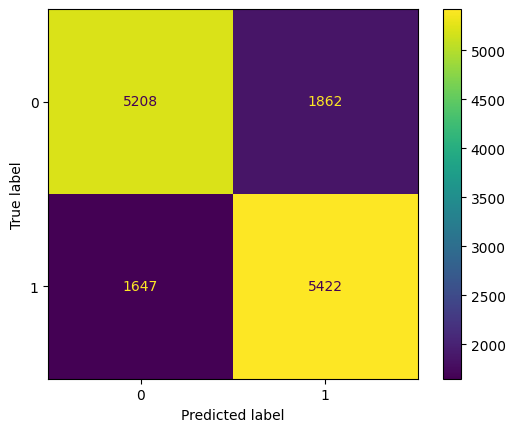

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialise standard scaler
scaler = StandardScaler()

# Create a logistic regression model without regularisation
logr = LogisticRegression()

# Create a pipeline with a standard scaler and the logistic regression model
pipe = Pipeline([
    #(nickname, step)
    ('scaler', scaler),
    ('logr', logr)
])

# Evaluate the model
evaluate_model(pipe, X_train, y_train, X_test, y_test)

                      Train      Test
balanced_accuracy  0.747122  0.751822
precision          0.747542  0.752055
recall             0.747122  0.751821
f1                 0.747015  0.751764
auc_roc            0.747122  0.751822 

Testing Set Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.74      0.75      7070
           1       0.74      0.77      0.76      7069

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



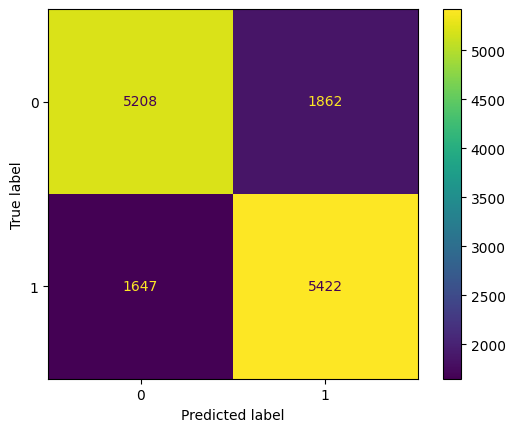

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Initialise standard scaler
scaler = StandardScaler()

# Create a logistic regression model without regularisation but with balanced class weights
logr = LogisticRegression(class_weight='balanced')

# Create a pipeline with a standard scaler and the logistic regression model
pipe = Pipeline([
    ('scaler', scaler),
    ('logr', logr)
])

# Evaluate the model
evaluate_model(pipe, X_train, y_train, X_test, y_test)


In [ ]:
# Initialise model
scaler = StandardScaler()
poly = PolynomialFeatures(interaction_only=True)  # will let GridSearch find the best degree

logr = LogisticRegression(
    # solver = ?,          # will let GridSearch find the best solver
    class_weight = 'balanced'
)

### Pipeline ###
pipe = Pipeline([
   #(nickname, step)
    ('poly', poly),  # degree selected by GridSearchCV
    ('scaler', scaler),
    ('logr', logr) # C selected by GridSearchCV
])

### Parameters to search over ###
param_grid = {
    #'step__param' : [list of param values]
    'poly__degree' : [1,2],
    'logr__solver' :['lbfgs', 'sag', 'saga']
}

### Validator ###
# Use 3 k-fold, considering the size of the dataset & computational power
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

## GridSearch ###
grid = GridSearchCV(pipe,       # model to use
                    param_grid, # parameters to search over
                    scoring = ['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'], # metrics to compute
                    refit = 'balanced_accuracy',  # which metric to use to decide the best model
                    cv = cv,
                    n_jobs = -1
                   )

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=88, shuffle=True),
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(interaction_only=True)),
                                       ('scaler', StandardScaler()),
                                       ('logr',
                                        LogisticRegression(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'logr__solver': ['lbfgs', 'sag', 'saga'],
                         'poly__degree': [1, 2]},
             refit='balanced_accuracy',
             scoring=['precision', 'recall', 'f1', 'balanced_accuracy',
                      'roc_auc'])

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'logr__solver': 'sag', 'poly__degree': 2}
0.7517008732735593


                      Train      Test
balanced_accuracy  0.753699  0.757482
precision          0.755739  0.758997
recall             0.753700  0.757479
f1                 0.753208  0.757124
auc_roc            0.753699  0.757482 

Testing Set Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75      7070
           1       0.74      0.80      0.77      7069

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.76     14139
weighted avg       0.76      0.76      0.76     14139



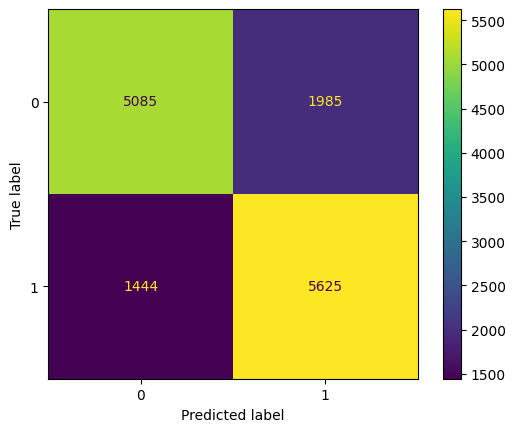

In [ ]:
# Initialise standard scaler
scaler = StandardScaler()
# Apply degree=2 to polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True)

# Create a logistic regression model without regularisation but with balanced class weights, apply solver='lbfgs'
logr = LogisticRegression(solver='lbfgs', class_weight = 'balanced')

# Create a pipeline with a standard scaler and the logistic regression model
pipe = Pipeline([
   #(nickname, step)
    ('poly', poly),
    ('scaler', scaler),
    ('logr', logr)
])

# Evaluate the model
evaluate_model(pipe, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.datasets import make_classification

# Generate synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Initialise model
scaler = StandardScaler()
poly = PolynomialFeatures(interaction_only=True)

svc = LinearSVC(class_weight='balanced', dual=True)

# Pipeline
pipe = Pipeline([
    # (nickname, step)
    ('poly', poly),  # degree selected by RandomizedSearchCV
    ('scaler', scaler),
    ('svc', svc)  # C selected by RandomizedSearchCV
])

# Parameters to search over
param_dist = {
    'poly__degree': [1, 2],
    'svc__C': [0.001, 0.01, 0.1, 1]
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=10,  # adjust as needed
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
    refit='balanced_accuracy',
    cv=cv,
    random_state=88,
    n_jobs=-1
)

# Fit the randomized search using the training data
random_search.fit(X_train, y_train)




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=88, shuffle=True),
                   estimator=Pipeline(steps=[('poly',
                                              PolynomialFeatures(interaction_only=True)),
                                             ('scaler', StandardScaler()),
                                             ('svc',
                                              LinearSVC(class_weight='balanced'))]),
                   n_jobs=-1,
                   param_distributions={'poly__degree': [1, 2],
                                        'svc__C': [0.001, 0.01, 0.1, 1]},
                   random_state=88, refit='balanced_accuracy',
                   scoring=['precision', 'recall', 'f1', 'balanced_accuracy',
                            'roc_auc'])

In [ ]:
print(random_search.best_estimator_.named_steps['svc'].get_params())  # Retrieve best parameters for the 'svc' step
print(random_search.best_score_)

{'C': 0.001, 'class_weight': 'balanced', 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': None, 'tol': 0.0001, 'verbose': 0}
0.9488110537092727


In [ ]:
from sklearn.metrics import accuracy_score

# ... (previous code for model training)

# Fit the model
pipe.fit(X_train, y_train)

# Predict on the test set
y_pred = pipe.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.9


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import RBFSampler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

# Generate synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Assuming X_train, X_test, y_train, and y_test are already defined

# Initialise model
scaler = StandardScaler()
rbf = RBFSampler()  # will let GridSearch find the best gamma
svc = LinearSVC(class_weight='balanced', dual=True)

# Pipeline
pipe = Pipeline([
    # (nickname, step)
    ('rbf', rbf),  # gamma selected by RandomizedSearchCV
    ('scaler', scaler),
    ('svc', svc)  # C selected by RandomizedSearchCV
])

# Parameters to search over
param_dist = {
    'rbf__gamma': [0.01, 0.1, 1, 10, 100],
    'svc__C': [0.01, 0.1, 1]
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# RandomizedSearch

In [ ]:
pip install plotly

In [ ]:
import plotly.express as px
import pandas as pd

# Extract results from the randomized search
results = pd.DataFrame(random_search.cv_results_)

# Select only numeric columns for dimensions
numeric_dimensions = results.select_dtypes(include=['float64', 'int64']).columns

# Create a scatter plot for each pair of parameters
fig = px.scatter_matrix(
    results,
    dimensions=numeric_dimensions,
    color='mean_test_balanced_accuracy',
    labels={'param_rbf__gamma': 'Gamma', 'param_svc__C': 'C'},
    title='RandomizedSearchCV Results',
    range_color=[results['mean_test_balanced_accuracy'].min(), results['mean_test_balanced_accuracy'].max()]
)

# Show the figure
fig.show()


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.kernel_approximation import RBFSampler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification

# Generate synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Assuming X_train, X_test, y_train, and y_test are already defined

# Initialise model
scaler = StandardScaler()
rbf = RBFSampler()  # will let RandomizedSearchCV find the best gamma
svc = LinearSVC(class_weight='balanced', dual=True)

# Pipeline
pipe = Pipeline([
    # (nickname, step)
    ('rbf', rbf),  # gamma selected by RandomizedSearchCV
    ('scaler', scaler),
    ('svc', svc)  # C selected by RandomizedSearchCV
])

# Parameters to search over
param_dist = {
    'rbf__gamma': [0.01, 0.1, 1, 10, 100],
    'svc__C': [0.01, 0.1, 1]
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=10,
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
    refit='balanced_accuracy',
    cv=cv,
    random_state=88,
    n_jobs=-1
)

# Fit the randomized search using the training data
random_search.fit(X_train, y_train)

# Retrieve best parameters for the 'svc' step
print(random_search.best_params_)

# Retrieve best score
print(random_search.best_score_)


{'svc__C': 1, 'rbf__gamma': 0.01}
0.8813079908499756


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# ... (previous code)

# Fit the model
pipe.fit(X_train, y_train)

# Predict on the test set
y_pred = pipe.predict(X_test)

# Evaluate the model using standard metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.51
Precision: 0.49074074074074076
Recall: 0.5520833333333334
F1 Score: 0.5196078431372548
Confusion Matrix:
 [[49 55]
 [43 53]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# ... (previous code)

# Create a Random Forest model with balanced class weights
rfc = RandomForestClassifier(
    n_estimators=100,  # default
    max_features='sqrt',
    # max_depth= ?, # to optimise
    # max_leaf_nodes = ?,  # to optimise
    # min_samples_split = ? # to optimise
    class_weight='balanced',  # ensure balanced weights to account for class imbalance (balanced, balanced_subsample - very similar results)
    random_state=88
)

# Parameters to search over
param_grid = {
    'max_depth': [15, 20, 25, 30],
    'max_leaf_nodes': [50, 75, 100, 150],
    'min_samples_split': [50, 100, 200, 400]
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# GridSearch
grid = GridSearchCV(
    rfc,  # model to use
    param_grid,  # parameters to search over
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],  # metrics to compute
    refit='balanced_accuracy',  # which metric to use to decide the best model
    cv=cv,
    n_jobs=-1
)

grid.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=88, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=88),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20, 25, 30],
                         'max_leaf_nodes': [50, 75, 100, 150],
                         'min_samples_split': [50, 100, 200, 400]},
             refit='balanced_accuracy',
             scoring=['precision', 'recall', 'f1', 'balanced_accuracy',
                      'roc_auc'])

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': 15, 'max_leaf_nodes': 50, 'min_samples_split': 50}
0.8999123979403878


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit the RandomForestClassifier model
rfc.fit(X_train, y_train)

# Predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9100
Precision: 0.8980
Recall: 0.9167
F1 Score: 0.9072


In [ ]:
from xgboost import XGBClassifier

# Calculate the ratio of the number of negative class samples to positive class samples
balanced_weights = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

param_grid = {
    'max_depth': [1, 3, 5, 7],  # default is 6   # train on small trees / decision stumps  # the higher the depth, the more likely to overfit
    'learning_rate' : [0.1, 0.2, 0.3, 0.4],  # default is 0.3   # learning_rate
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]    # default is 1    # Subsample ratio of the training instances, lower value prevents overfitting
}

# Create an XGBoost model with scale_pos_weight
xgb = XGBClassifier(booster='gbtree', scale_pos_weight=balanced_weights, random_state=88)

### Validator ###
# Use 3 k-fold, considering the size of the dataset & computational power
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

## GridSearch ###
grid = GridSearchCV(xgb,       # model to use
                    param_grid, # parameters to search over
                    scoring = ['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'], # metrics to compute
                    refit = 'balanced_accuracy',  # which metric to use to decide the best model
                    cv = cv,
                    n_jobs = -1
                   )

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=88, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=88, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': [1, 3, 5, 7],
                         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1]},
             refit='balanced_accuracy',
             scoring=['precision', 'recall', 'f1', 'balanced_accuracy',
                      'roc_auc'])

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'learning_rate': 0.3, 'max_depth': 5, 'subsample': 0.9}
0.9274481455779165


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Fit the XGBoost model
xgb.fit(X_train, y_train)

# Predictions on the test set
y_pred = xgb.predict(X_test)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9300
Precision: 0.9100
Recall: 0.9479
F1 Score: 0.9286


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Define the base models
scaler = StandardScaler()
poly = PolynomialFeatures(degree=2, interaction_only=True)
logr = LogisticRegression(solver='lbfgs', class_weight='balanced')
logr_base = Pipeline([
    ('poly', poly),
    ('scaler', scaler),
    ('logr', logr)
])

# Define the SVM with RBF base model
rbf = RBFSampler()
svc = LinearSVC(class_weight='balanced', C=1, dual=True)
svm_rbf_base = Pipeline([
    ('rbf', rbf),  # <-- Add the missing comma here
    ('svc', svc)   # <-- Add the missing closing parenthesis here
])


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.datasets import make_classification

# Generate synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Create a Random Forest model with balanced class weights
rfc = RandomForestClassifier(class_weight='balanced', random_state=88)

# Parameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [15, 20, 25, 30],
    'max_leaf_nodes': [50, 75, 100, 150],
    'min_samples_split': [50, 100, 200, 400]
}

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# GridSearchCV
grid = GridSearchCV(
    rfc,
    param_grid,
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
    refit='balanced_accuracy',
    cv=cv,
    n_jobs=-1
)

# Fit the grid search using the training data
grid.fit(X_train, y_train)

# Print best parameters and best scores for all metrics
print("Best Parameters:", grid.best_params_)
print("Best Balanced Accuracy:", grid.best_score_)
print("Best Precision:", grid.cv_results_['mean_test_precision'][grid.best_index_])
print("Best Recall:", grid.cv_results_['mean_test_recall'][grid.best_index_])
print("Best F1 Score:", grid.cv_results_['mean_test_f1'][grid.best_index_])


Best Parameters: {'max_depth': 15, 'max_leaf_nodes': 50, 'min_samples_split': 50, 'n_estimators': 300}
Best Balanced Accuracy: 0.911211135956683
Best Precision: 0.9098954860034957
Best Recall: 0.9160493827160493
Best F1 Score: 0.9126472140341225


In [ ]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=10,  # adjust as needed
    scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
    refit='balanced_accuracy',
    cv=cv,
    random_state=88,
    n_jobs=-1
)

# Fit the randomized search using the training data
random_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)



Best Parameters: {'svc__C': 0.01, 'rbf__gamma': 0.1}
Best Score: 0.9200126798091174


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning:

[16:48:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "rbf__gamma", "svc__C" } are not used.




In [ ]:
def evaluate_model(models):
    """
    Takes a list of models and returns a chart of cross-validation scores using mean accuracy
    """

    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits=10)

    result = []
    for model in models:
        result.append(cross_val_score(estimator=model, X=x_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans": cv_means,
        "CrossValerrors": cv_std,
        "Models": [
            "LogisticRegression",
            "XGBClassifier",
            "Linear SVC",
            "RandomForestClassifier",
        ]
    })

    # Generate chart
    bar = sns.barplot(x="CrossValMeans", y="Models", data=result_df, orient="h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")

    # Print the mean accuracy
    print("Mean Accuracy:")
    print(result_df["CrossValMeans"])

    return result_df


In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Generate example data (replace with your actual data)
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split your data into training and testing sets (replace with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

# Define your existing models list
models = [
    LogisticRegression(random_state=20, solver='liblinear'),
    XGBClassifier(random_state=20, learning_rate=0.5),
    LinearSVC(random_state=20),
    RandomForestClassifier(random_state=20)
]

# Create a KFold object with the desired number of splits (e.g., 5)
kfold = KFold(n_splits=5, shuffle=True, random_state=20)  # Adjust as needed

# Evaluate the models
for model in models:
    scores = cross_val_score(estimator=model, X=X_train, y=y_train, scoring="accuracy", cv=kfold, n_jobs=4)
    print(f"Model: {model.__class__.__name__}, Mean Accuracy: {scores.mean():.4f}")


Model: LogisticRegression, Mean Accuracy: 0.8433
Model: XGBClassifier, Mean Accuracy: 0.9083
Model: LinearSVC, Mean Accuracy: 0.8450
Model: RandomForestClassifier, Mean Accuracy: 0.9083


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

# Models to evaluate
models = [
    LogisticRegression(random_state=20, solver='liblinear'),
    XGBClassifier(random_state=20, learning_rate=0.5),
    LinearSVC(random_state=20),
    RandomForestClassifier(class_weight='balanced', random_state=88)
]

# Parameters to search over for each model
param_grids = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10]
    },
    {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.1, 0.01]
    },
    {
        'C': [0.1, 1, 10]
    },
    {
        'n_estimators': [100, 200, 300],
        'max_depth': [15, 20, 25, 30],
        'max_leaf_nodes': [50, 75, 100, 150],
        'min_samples_split': [50, 100, 200, 400]
    }
]

# Validator
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=88)

# Perform GridSearchCV for each model
for model, param_grid in zip(models, param_grids):
    grid = GridSearchCV(
        model,
        param_grid,
        scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
        refit='balanced_accuracy',
        cv=cv,
        n_jobs=-1
    )

    # Fit the grid search using the training data
    grid.fit(X_train, y_train)

    # Print best parameters and best scores for all metrics
    print(f"Model: {model.__class__.__name__}")
    print("Best Parameters:", grid.best_params_)
    print("Best Balanced Accuracy:", grid.best_score_)
    print("Best Precision:", grid.cv_results_['mean_test_precision'][grid.best_index_])
    print("Best Recall:", grid.cv_results_['mean_test_recall'][grid.best_index_])
    print("Best F1 Score:", grid.cv_results_['mean_test_f1'][grid.best_index_])
    print()


Model: LogisticRegression
Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Best Balanced Accuracy: 0.8544360055174304
Best Precision: 0.8280962223566579
Best Recall: 0.9012345679012345
Best F1 Score: 0.8629954333337496

Model: XGBClassifier
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best Balanced Accuracy: 0.9223976405274116
Best Precision: 0.9155888403804746
Best Recall: 0.9333333333333332
Best F1 Score: 0.9243006220201445

Model: LinearSVC
Best Parameters: {'C': 1}
Best Balanced Accuracy: 0.8423060117716606
Best Precision: 0.8348895844201009
Best Recall: 0.8592592592592592
Best F1 Score: 0.8468036968157305

Model: RandomForestClassifier
Best Parameters: {'max_depth': 15, 'max_leaf_nodes': 50, 'min_samples_split': 50, 'n_estimators': 300}
Best Balanced Accuracy: 0.911211135956683
Best Precision: 0.9098954860034957
Best Recall: 0.9160493827160493
Best F1 Score: 0.9126472140341225

